### Exploratory Data Analysis On United State Census Documentary from 2010 to 2015

In [1]:
# import necesary libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
census_data = pd.read_excel(r'C:\Users\arum chimdiebube\Desktop\census 1.xlsx')
census_data

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,1.072643,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,-1.589565,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-17.755986,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-11.637475,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961


## Data inspection and Manipulation

In [3]:
## shape of Data
census_data.shape

(3193, 100)

In [4]:
## check the info
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193 entries, 0 to 3192
Data columns (total 100 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SUMLEV                 3193 non-null   int64  
 1   REGION                 3193 non-null   int64  
 2   DIVISION               3193 non-null   int64  
 3   STATE                  3193 non-null   int64  
 4   COUNTY                 3193 non-null   int64  
 5   STNAME                 3193 non-null   object 
 6   CTYNAME                3193 non-null   object 
 7   CENSUS2010POP          3193 non-null   int64  
 8   ESTIMATESBASE2010      3193 non-null   int64  
 9   POPESTIMATE2010        3193 non-null   int64  
 10  POPESTIMATE2011        3193 non-null   int64  
 11  POPESTIMATE2012        3193 non-null   int64  
 12  POPESTIMATE2013        3193 non-null   int64  
 13  POPESTIMATE2014        3193 non-null   int64  
 14  POPESTIMATE2015        3193 non-null   int64  
 15  NPO

### Question 1. Which state has the most countries in it? (hint: consider the sumlevel key    carefully!  You'll            need this forfuture questions too..

In [6]:
# Group the DataFrame by state and count the number of counties in each state
counties_by_state = census_data.groupby('STATE')['COUNTY'].nunique()

# Find the state(s) with the most counties
states_with_most_counties = counties_by_state[counties_by_state == counties_by_state.max()]

print("The state(s) with the most counties are:")
for state in states_with_most_counties.index:
    print(state)


The state(s) with the most counties are:
48


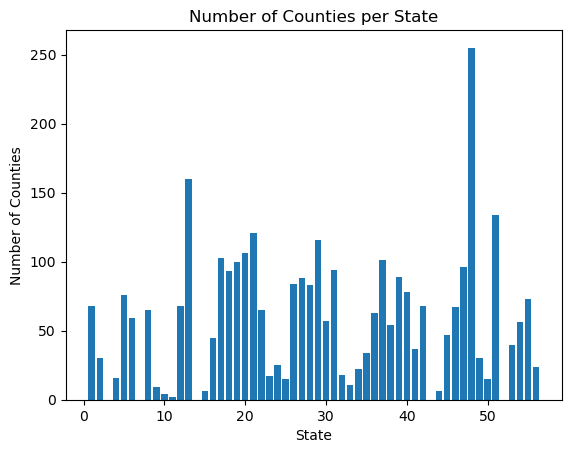

In [13]:
import matplotlib.pyplot as plt

# Create a bar chart of the number of counties per state
plt.bar(counties_by_state.index, counties_by_state.values)

# Set the title and axis labels
plt.title('Number of Counties per State')
plt.xlabel('State')
plt.ylabel('Number of Counties')

# Display the chart
plt.show()


### Qestion 2. Only looking at the three most populous countries for each state, what are the three most 
### populous states (in order of highest population to lowest population)? Use CENSUS2010POP

In [16]:
# Group by state and sum the population
populations = census_data.groupby('STNAME')['POPESTIMATE2010'].sum()

# Sort the populations in descending order and get the top three
top_three = populations.sort_values(ascending=False)[:3]

# Print the top three most populous states
print("The three most populous states in the United States are:")
for i, state in enumerate(top_three.index):
    print(f"{i+1}. {state}")


The three most populous states in the United States are:
1. California
2. Texas
3. New York


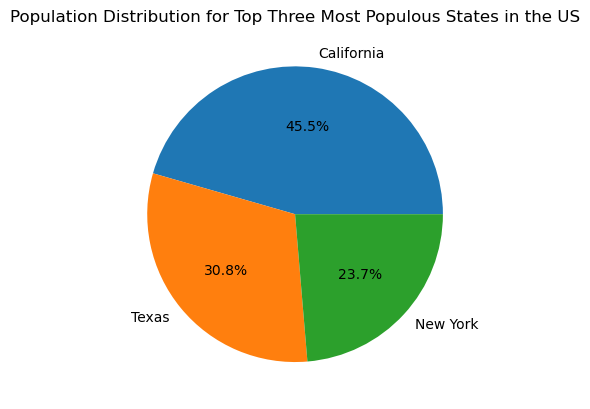

In [17]:
# Group by state and sum the population
populations = census_data.groupby('STNAME')['POPESTIMATE2010'].sum()

# Sort the populations in descending order and get the top three
top_three = populations.sort_values(ascending=False)[:3]

# Create a pie chart of the population distribution for the top three states
plt.pie(top_three, labels=top_three.index, autopct='%1.1f%%')
plt.title('Population Distribution for Top Three Most Populous States in the US')
plt.show()


In [ ]:
Observation
These states have large populations due to factors such as high levels of immigration, large urban areas,
and favorable climate and geography.

### Question 3. Which city has the most countries in it?

In [23]:
# Select the columns we want to use
census_data = census_data[['CTYNAME', 'COUNTY']]

# Count the number of counties for each CTYNAME
count = census_data.groupby('CTYNAME')['COUNTY'].count()

# Sort the count by descending order
count = count.sort_values(ascending=False)

# Print the top 10 CTYNAMEs with the most counties
print(count.head(10))


CTYNAME
Washington County    30
Jefferson County     25
Franklin County      24
Jackson County       23
Lincoln County       23
Madison County       19
Clay County          18
Montgomery County    18
Union County         17
Monroe County        17
Name: COUNTY, dtype: int64


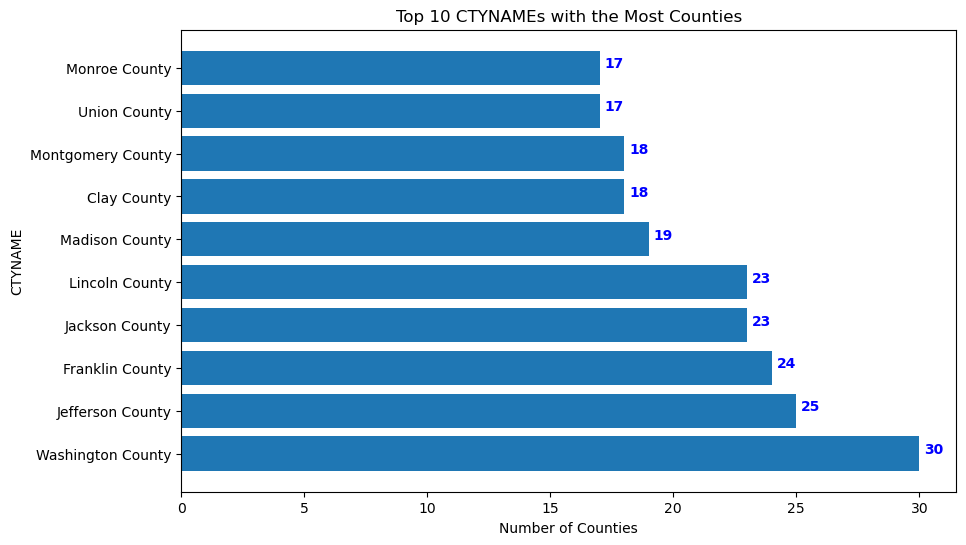

In [24]:
import matplotlib.pyplot as plt

# Select the columns we want to use
census_data = census_data[['CTYNAME', 'COUNTY']]

# Count the number of counties for each CTYNAME
count = census_data.groupby('CTYNAME')['COUNTY'].count()

# Sort the count by descending order
count = count.sort_values(ascending=False)

# Create a horizontal bar chart with data labels
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(count.index[:10], count.values[:10])
ax.set_title('Top 10 CTYNAMEs with the Most Counties')
ax.set_xlabel('Number of Counties')
ax.set_ylabel('CTYNAME')
for i, v in enumerate(count.values[:10]):
    ax.text(v + 0.2, i, str(v), color='blue', fontweight='bold')

# Display the chart
plt.show()


 ### Question 4. Which region has the most division in it?

In [19]:
max_reg = census_data.groupby('REGION')['DIVISION'].max().sort_values()
max_reg

REGION
1    2
2    4
3    7
4    9
Name: DIVISION, dtype: int64